# Importar biblioteca

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from textblob import TextBlob

# download de stopwords de nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Organizar DataFrame

In [2]:
df1 = pd.read_excel('WheyWords.xlsx')
df1 = df1.rename(columns={'Title': 'Reviews'})
df1 = df1.dropna(subset='Reviews').reset_index(drop=True)
#df1.to_csv('WheyWords_Reedit.csv')
df2 = pd.read_csv('twitter_whey_V3.csv', sep=',')
df2 = df2.rename(columns={'Embedded_text': 'Reviews'})
df2 = df2.dropna(subset='Reviews').reset_index(drop=True)
#df2.to_csv('WheyWords_Twitter.csv')

In [3]:
df_reddit = pd.read_csv('WheyWords_Reedit.csv',usecols=['Reviews','Score','Total Comments'])
df_reddit = pd.DataFrame(df_reddit)
df_reddit

,Reviews,Score,Total Comments
0,Discover Food that Contains Iron- 10 Delicious...,0,0
1,Is Women’s Best protein and supplements actual...,2,4
2,Unflavored protein powder / isolate?,3,1
3,When to intake protein for weight loss,1,5
4,Optimum Nutrition best flavors?,2,0
...,...,...,...
940,Too much sodium in my protein?,1,1
941,What is going on with P28 bread?!?!?!,6,7
942,I'm 15 60kg 5'8,1,4
943,Which one is the best protein Powder in 2020?,1,4


In [4]:
df_twitter = pd.read_csv('WheyWords_Twitter.csv',usecols=['Reviews', 'Likes', 'Comments', 'Retweets'])
df_twitter = pd.DataFrame(df_twitter)
df_twitter

,Reviews,Comments,Likes,Retweets
0,"i will not give context, i just find this imag...",1,NaN,3
1,Apenas um treino usando uma gostosa,3,58,869
2,"MONTY'S APE WATCH Mega ""UNDER 10 $SOL"" Editi...",4,3,19
3,Foreign types with the hookah pipes say ay oh ...,NaN,NaN,NaN
4,I use to have my autocorrect change “way” to “...,2,NaN,NaN
...,...,...,...,...
8413,treino assim pra quem não sabe,26,61,242
8414,FELLOW GAYMERS RISE UP,NaN,1,5
8415,Shit is about to get incredibly annoying,5,NaN,15
8416,O TREINO INOVADOR DO CORINTHIANS,82,185,"1,631"


# Análise de sentimento

In [5]:
df_reddit['Sentiment'] = df_reddit['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_twitter['Sentiment'] = df_twitter['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
#Criar a função para idetificar se a polaridade é positivo, neutro ou negativo
def polaridade(nota):
    if nota > 0:
        return (1, 'Positivo')
    elif nota < 0:
        return (-1, 'Negativo')
    else:
        return (0, 'Neutro')
    
# Adicionar tanto a polaridade em número quanto em texto em uma nova coluna
df_reddit[['polaridade_num', 'polaridade_texto']] = df_reddit['Sentiment'].apply(polaridade).apply(pd.Series)
#df_reddit
df_twitter[['polaridade_num', 'polaridade_texto']] = df_twitter['Sentiment'].apply(polaridade).apply(pd.Series)
df_twitter

,Reviews,Comments,Likes,Retweets,Sentiment,polaridade_num,polaridade_texto
0,"i will not give context, i just find this imag...",1,NaN,3,0.250,1,Positivo
1,Apenas um treino usando uma gostosa,3,58,869,0.000,0,Neutro
2,"MONTY'S APE WATCH Mega ""UNDER 10 $SOL"" Editi...",4,3,19,0.540,1,Positivo
3,Foreign types with the hookah pipes say ay oh ...,NaN,NaN,NaN,-0.125,-1,Negativo
4,I use to have my autocorrect change “way” to “...,2,NaN,NaN,0.000,0,Neutro
...,...,...,...,...,...,...,...
8413,treino assim pra quem não sabe,26,61,242,0.000,0,Neutro
8414,FELLOW GAYMERS RISE UP,NaN,1,5,0.000,0,Neutro
8415,Shit is about to get incredibly annoying,5,NaN,15,-0.500,-1,Negativo
8416,O TREINO INOVADOR DO CORINTHIANS,82,185,"1,631",0.000,0,Neutro


In [16]:
df_reddit.to_csv('df_reddit_sentiment')
df_twitter.to_csv('df_twitter_sentiment')

## Comparação das redes sociais

In [40]:
df1= pd.read_csv('df_reddit_sentiment')
df1

,Unnamed: 0,Reviews,Score,Total Comments,Sentiment,polaridade_num,polaridade_texto
0,0,Discover Food that Contains Iron- 10 Delicious...,0,0,1.00,1,Positivo
1,1,Is Women’s Best protein and supplements actual...,2,4,0.85,1,Positivo
2,2,Unflavored protein powder / isolate?,3,1,0.00,0,Neutro
3,3,When to intake protein for weight loss,1,5,0.00,0,Neutro
4,4,Optimum Nutrition best flavors?,2,0,0.85,1,Positivo
...,...,...,...,...,...,...,...
940,940,Too much sodium in my protein?,1,1,0.20,1,Positivo
941,941,What is going on with P28 bread?!?!?!,6,7,0.00,0,Neutro
942,942,I'm 15 60kg 5'8,1,4,0.00,0,Neutro
943,943,Which one is the best protein Powder in 2020?,1,4,1.00,1,Positivo


In [41]:
df2= pd.read_csv('df_twitter_sentiment')
df2

,Unnamed: 0,Reviews,Comments,Likes,Retweets,Sentiment,polaridade_num,polaridade_texto
0,0,"i will not give context, i just find this imag...",1,NaN,3,0.250,1,Positivo
1,1,Apenas um treino usando uma gostosa,3,58,869,0.000,0,Neutro
2,2,"MONTY'S APE WATCH Mega ""UNDER 10 $SOL"" Editi...",4,3,19,0.540,1,Positivo
3,3,Foreign types with the hookah pipes say ay oh ...,NaN,NaN,NaN,-0.125,-1,Negativo
4,4,I use to have my autocorrect change “way” to “...,2,NaN,NaN,0.000,0,Neutro
...,...,...,...,...,...,...,...,...
8413,8413,treino assim pra quem não sabe,26,61,242,0.000,0,Neutro
8414,8414,FELLOW GAYMERS RISE UP,NaN,1,5,0.000,0,Neutro
8415,8415,Shit is about to get incredibly annoying,5,NaN,15,-0.500,-1,Negativo
8416,8416,O TREINO INOVADOR DO CORINTHIANS,82,185,"1,631",0.000,0,Neutro


### Conferência de quantidade de polaridade de cada DF

In [29]:
positive_reddit = df1[df1['polaridade_texto'] == 'Positivo'].shape[0]
negative_reddit = df1[df1['polaridade_texto'] == 'Negativo'].shape[0]
neutral_reddit = df1[df1['polaridade_texto'] == 'Neutro'].shape[0]

print("Quantidade de sentimento positivo:", positive_count)
print("Quantidade de sentimento negativo:", negative_count)
print("Quantidade de sentimento neutro:", neutral_count)

Quantidade de sentimento positivo: 351
Quantidade de sentimento negativo: 88
Quantidade de sentimento neutro: 506


In [51]:
positive_twitter = df2[df2['polaridade_texto'] == 'Positivo'].shape[0]
negative_twitter = df2[df2['polaridade_texto'] == 'Negativo'].shape[0]
neutral_twitter = df2[df2['polaridade_texto'] == 'Neutro'].shape[0]

print("Quantidade de sentimento positivo:", positive_count)
print("Quantidade de sentimento negativo:", negative_count)
print("Quantidade de sentimento neutro:", neutral_count)

Quantidade de sentimento positivo: 2449
Quantidade de sentimento negativo: 818
Quantidade de sentimento neutro: 5151


# Frequencia de palavras
**DESAFIO**
palavras/termos com alta frequência, mas em um contexto negativo para o público-alvo

In [53]:
# Carregar stopword em ingles
stop_words_en = set(stopwords.words('english'))

# Carregar stopword em português
stop_words_pt = set(stopwords.words('portuguese'))

### Analisar frequência dos dados de Reddit

In [61]:
df_neg = df1.loc[(df1['polaridade_texto']=='Negativo')]
df_neg

,Unnamed: 0,Reviews,Score,Total Comments,Sentiment,polaridade_num,polaridade_texto
11,11,doesn't anyone make just plain whey protein wi...,2,11,-0.214286,-1,Negativo
12,12,Why was this shake so awful?,2,0,-1.000000,-1,Negativo
35,35,Recommendation of an additive-free / low-addit...,2,1,-0.062500,-1,Negativo
36,36,I'm tired of lumpy shakes.,2,1,-0.400000,-1,Negativo
40,40,I'm confused on the size of the scoop of my pr...,3,7,-0.400000,-1,Negativo
...,...,...,...,...,...,...,...
900,900,Protein heavy meals?,5,4,-0.200000,-1,Negativo
915,915,I got a question. I’m buying the Gatorade Prot...,1,3,-0.093750,-1,Negativo
920,920,I’ve been using Premier Protein as a supplemen...,2,14,-0.233333,-1,Negativo
937,937,Odd question alert - Whey powder and porridge/...,2,1,-0.166667,-1,Negativo


In [62]:
reddit_text = ' '.join(df_neg['Reviews'].astype(str))
reddit_words = [word.lower() for word in nltk.word_tokenize(reddit_text) if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]
reddit_word_freq = Counter(reddit_words)

In [69]:
df_wordfreq_reddit = pd.DataFrame.from_dict(reddit_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_reddit.columns = ['Palavra', 'Frequência']
#display(df_wordfreq_reddit)
#df_wordfreq_reddit.to_csv('df_wordfreq_reddit.csv')

### Nuvem de palavras

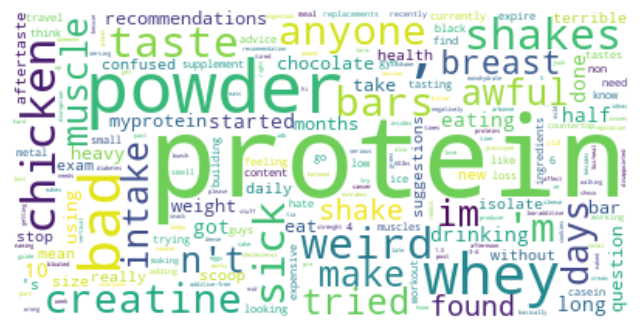

In [67]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(reddit_word_freq)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Analisar frequência dos dados de Twitter

In [52]:
df_neg = df2.loc[(df2['polaridade_texto']=='Negativo')]
df_neg

,Unnamed: 0,Reviews,Comments,Likes,Retweets,Sentiment,polaridade_num,polaridade_texto
3,3,Foreign types with the hookah pipes say ay oh ...,NaN,NaN,NaN,-0.125000,-1,Negativo
28,28,I must be a mad man. Throw down a run before a...,NaN,NaN,NaN,-0.390278,-1,Negativo
31,31,Me wah know whey di bloodclaat old foot Biden ...,NaN,NaN,1,-0.200000,-1,Negativo
36,36,T-Minus 50 days until the 2022 NOBULL #CrossFi...,NaN,NaN,6,-0.229167,-1,Negativo
44,44,Congrats to the team winners of the \n@atlasga...,NaN,NaN,3,-0.055556,-1,Negativo
...,...,...,...,...,...,...,...,...
8368,8368,weight cut gonna be insane fr,1,NaN,1,-1.000000,-1,Negativo
8382,8382,Claims to hate pedos.\n\nStans the guy that sa...,4,NaN,22,-0.800000,-1,Negativo
8395,8395,5 Sets: (rest 2:30 b/w)\n\n3 Rounds\n-6 Alt Ha...,5,6,54,-0.750000,-1,Negativo
8408,8408,Working hard on my crossfit.\n#CatsOfTwitter #...,7,32,528,-0.291667,-1,Negativo


In [54]:
reddit_text = ' '.join(df_neg['Reviews'].astype(str))
reddit_words = [word.lower() for word in nltk.word_tokenize(reddit_text) if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]
reddit_word_freq = Counter(reddit_words)

In [57]:
df_wordfreq_reddit = pd.DataFrame.from_dict(reddit_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_reddit.columns = ['Palavra', 'Frequência']
#display(df_wordfreq_reddit)
#df_wordfreq_reddit.to_csv('df_wordfreq_reddit.csv')

### Nuvem de palavras

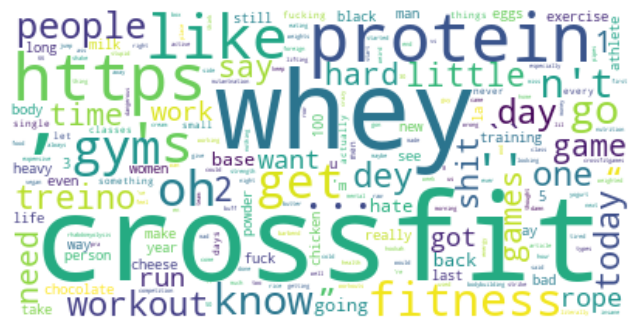

In [58]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(reddit_word_freq)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Frequencia de palavras POLARIDADE GERAL

In [8]:
# Carregar stopword em ingles
stop_words_en = set(stopwords.words('english'))

# Carregar stopword em português
stop_words_pt = set(stopwords.words('portuguese'))

### Analisar frequência dos dados de Reddit

In [9]:
reddit_text = ' '.join(df_reddit['Reviews'].astype(str))
reddit_words = [word.lower() for word in nltk.word_tokenize(reddit_text) if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]
reddit_word_freq = Counter(reddit_words)

In [10]:
df_wordfreq_reddit = pd.DataFrame.from_dict(reddit_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_reddit.columns = ['Palavra', 'Frequência']
#display(df)
#df_wordfreq_reddit.to_csv('df_wordfreq_reddit.csv')

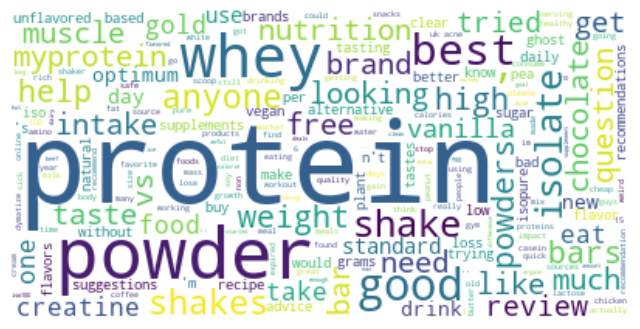

In [11]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(reddit_word_freq)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Analisar frequência dos dados de Twitter

In [12]:
twitter_text = ' '.join(df_twitter['Reviews'].astype(str))
twitter_words = [word.lower() for word in nltk.word_tokenize(twitter_text) if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]
twitter_word_freq = Counter(twitter_words)

In [13]:
df_wordfreq_twitter = pd.DataFrame.from_dict(twitter_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_twitter.columns = ['Palavra', 'Frequência']
#display(df)
#df_wordfreq_twitter.to_csv('df_wordfreq_twitter.csv')

#### Nuvem de palavras

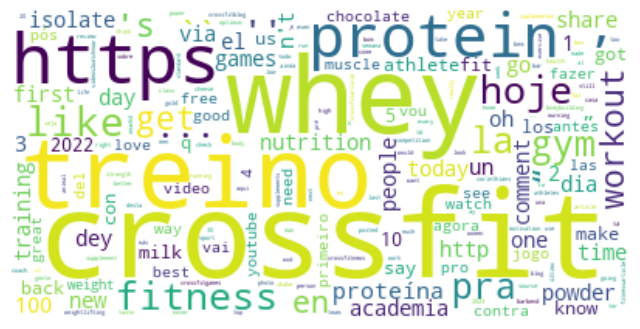

In [14]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(twitter_word_freq)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 